<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/3erParcial__ILRA_1899843_EAG41_nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica Aplicada
##Tercer Parcial
###Ivanna Lizeth Rodriguez Ambriz
###1899843
Grupo 41

In [256]:
#Basicas
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#especializadas

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA


In [257]:
#importamos libreria especializada
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
pip install pmdarima

In [259]:
#pmdarima
import pmdarima as pm

#1

In [260]:
#base de datos e index
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
pasajeros.head(3)

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0


In [261]:
#damos bien el formato de fecha

pasajeros['mes']=pd.to_datetime(pasajeros['mes'],format='%Y/%m')
pasajeros.head(3)

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995-01-01,3439.0,3240.0
1,1995-02-01,2879.0,3623.0
2,1995-03-01,3103.0,3990.0


In [262]:
#tipo de variables
pasajeros.dtypes

mes                          datetime64[ns]
miles de pasajeros                  float64
ingresos (miles de pesos)           float64
dtype: object

In [263]:
#missing values
pasajeros.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [264]:
#ponemos el index
pasajeros=pasajeros.set_index('mes')
pasajeros.head(2)

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0


In [265]:
#frecuencia
pasajeros=pasajeros.asfreq('MS')

In [266]:
pasajeros.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

#2

In [267]:
# a) Rango de fechas
inicio_fecha = pasajeros.index.min()
fin_fecha = pasajeros.index.max()

print(f'El rango de fechas es de: {inicio_fecha}  a  {fin_fecha}')


El rango de fechas es de: 1995-01-01 00:00:00  a  2023-08-01 00:00:00


In [268]:
# b) Número de observaciones

num_observaciones = len(pasajeros)
print(f'Número de observaciones: {num_observaciones}')

Número de observaciones: 344


In [269]:
# c) Valor mínimo y valor máximo del número de pasajeros

min_ingresos = pasajeros['ingresos (miles de pesos)'].min()
max_ingresos = pasajeros['ingresos (miles de pesos)'].max()
print(f'Valor mínimo de ingresos es: {min_ingresos}')
print(f'Valor máximo de ingresos es: {max_ingresos}\n')



min_milespasajeros = pasajeros['ingresos (miles de pesos)'].min()
max_milespasajeros = pasajeros['ingresos (miles de pesos)'].max()
print(f'Valor mínimo de miles de pasajeros es: {min_milespasajeros}')
print(f'Valor máximo de miles de pasajeros es: {max_milespasajeros}')

Valor mínimo de ingresos es: 134.0
Valor máximo de ingresos es: 58511.798

Valor mínimo de miles de pasajeros es: 134.0
Valor máximo de miles de pasajeros es: 58511.798


#3

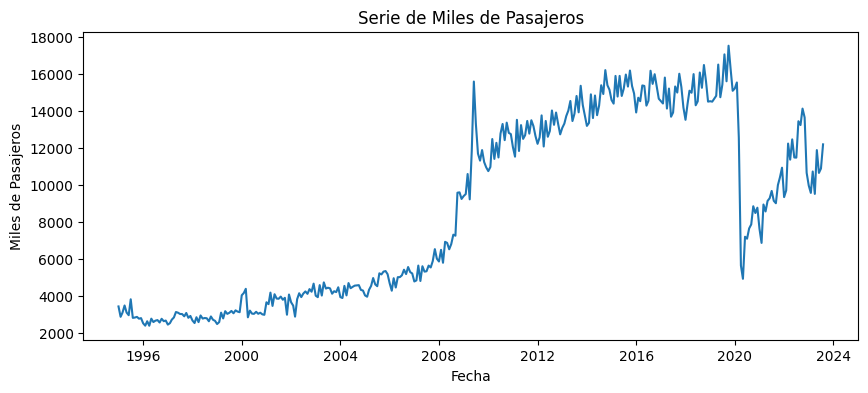

In [270]:
# Graficar la serie de miles de pasajeros
plt.figure(figsize=(10, 4))
plt.plot(pasajeros['miles de pasajeros'])
plt.title('Serie de Miles de Pasajeros')
plt.xlabel('Fecha')
plt.ylabel('Miles de Pasajeros');

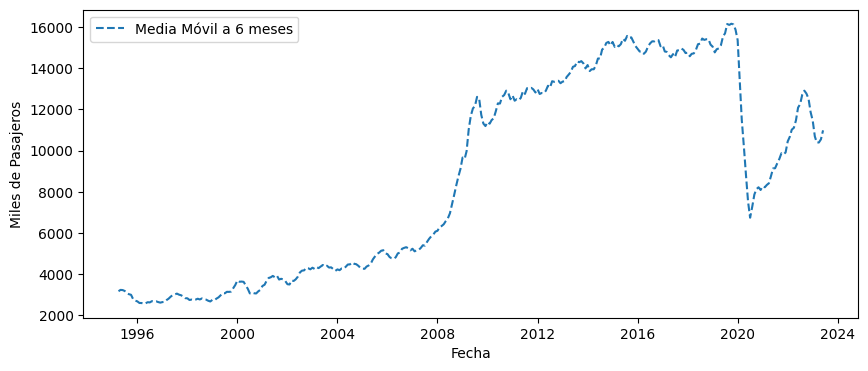

In [271]:

# Calcular y graficar la media móvil centrada a 6 meses
media_movil = pasajeros['miles de pasajeros'].rolling(window=6, center=True).mean()
plt.figure(figsize=(10, 4))
plt.plot(media_movil, label='Media Móvil a 6 meses', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Miles de Pasajeros')
plt.legend()
plt.show();

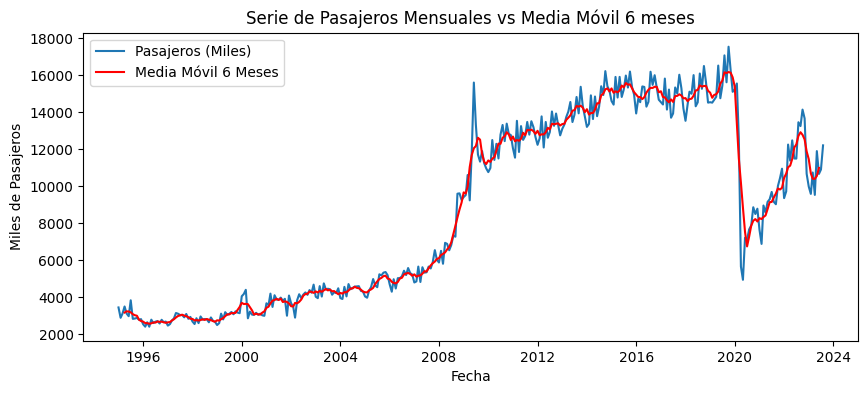

In [272]:
#  media móvil centrada 6 meses vs grafico miles de pasajeros
plt.figure(figsize=(10, 4))
plt.plot(pasajeros['miles de pasajeros'], label='Pasajeros (Miles)')
plt.plot(media_movil, label='Media Móvil 6 Meses', color='red')
plt.xlabel('Fecha')
plt.ylabel('Miles de Pasajeros')
plt.title('Serie de Pasajeros Mensuales vs Media Móvil 6 meses')
plt.legend()
plt.show();

La serie no tiene tendencia, podriamos decir que tiene un componente ciclico

En la grafica se observa que podria haber una tendencia de aumento, pero dado a que en los años que fue el covid hubo una baja muy considerable de pasajeros que usan el metrorey, entonces la grafica no muestra tendencia.

#4

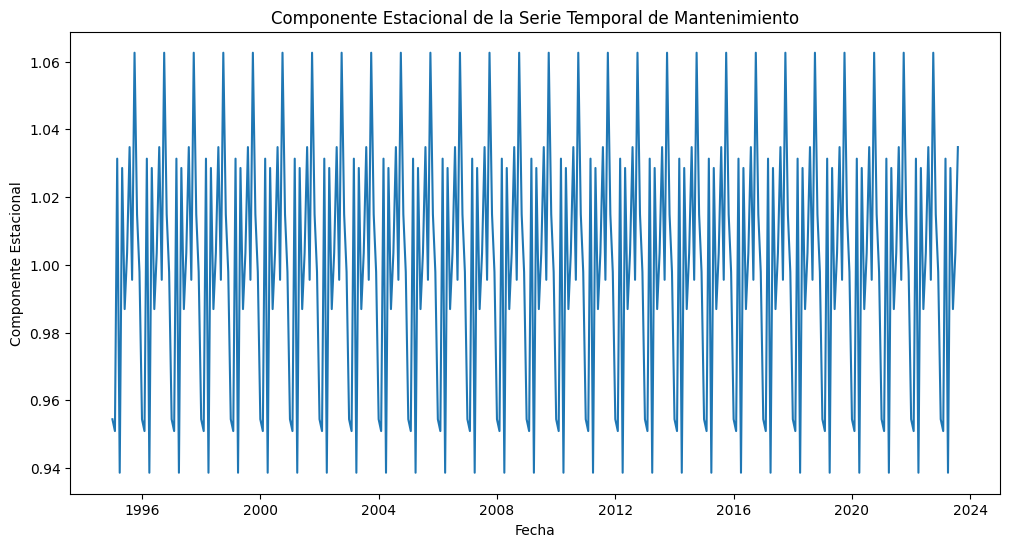

In [273]:
# Descomposición de la serie temporal utilizando ETS
result = sm.tsa.seasonal_decompose(pasajeros['miles de pasajeros'], model='multiplicative')

# componente estacional
componente_estacional = result.seasonal

# Grafica el componente estacional
plt.figure(figsize=(12, 6))
plt.plot(componente_estacional)
plt.title('Componente Estacional de la Serie Temporal de Mantenimiento')
plt.xlabel('Fecha')
plt.ylabel('Componente Estacional')
plt.show()


In [274]:
#  meses con los valores más altos en el componente estacional
meses_con_mayor_estacionalidad = componente_estacional[componente_estacional == componente_estacional.max()]

#  meses adecuados para dar mantenimiento
print("Meses adecuados para dar mantenimiento:\n")
print(meses_con_mayor_estacionalidad)

Meses adecuados para dar mantenimiento:

mes
1995-10-01    1.06261
1996-10-01    1.06261
1997-10-01    1.06261
1998-10-01    1.06261
1999-10-01    1.06261
2000-10-01    1.06261
2001-10-01    1.06261
2002-10-01    1.06261
2003-10-01    1.06261
2004-10-01    1.06261
2005-10-01    1.06261
2006-10-01    1.06261
2007-10-01    1.06261
2008-10-01    1.06261
2009-10-01    1.06261
2010-10-01    1.06261
2011-10-01    1.06261
2012-10-01    1.06261
2013-10-01    1.06261
2014-10-01    1.06261
2015-10-01    1.06261
2016-10-01    1.06261
2017-10-01    1.06261
2018-10-01    1.06261
2019-10-01    1.06261
2020-10-01    1.06261
2021-10-01    1.06261
2022-10-01    1.06261
Name: seasonal, dtype: float64


#5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


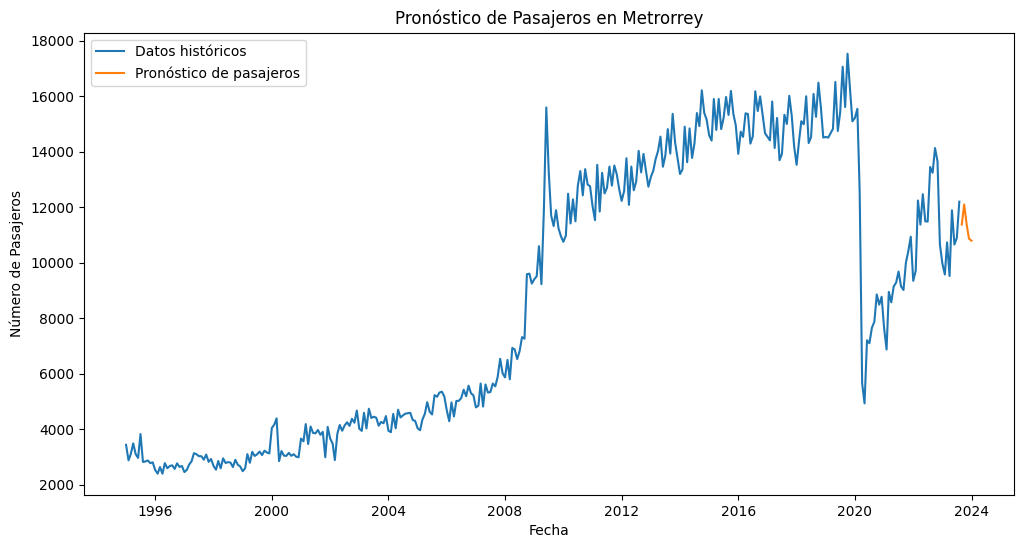

In [275]:

#  método de Holt-Winters para pronosticar el número de pasajeros
model = sm.tsa.ExponentialSmoothing(pasajeros['miles de pasajeros'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Pronosticar los próximos 5 meses
predicciones = model_fit.forecast(steps=5)

# Calcular los ingresos estimados multiplicando las predicciones por $7.1
ingresos_estimados = predicciones * 7.1

# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(pasajeros['miles de pasajeros'], label='Datos históricos')
plt.plot(predicciones, label='Pronóstico de pasajeros')
plt.title('Pronóstico de Pasajeros en Metrorrey')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show();

In [276]:
# Imprimir las predicciones y los ingresos estimados
print("Pronóstico de Pasajeros para los próximos 5 meses:")
print(predicciones)
print("\nIngresos Estimados para los próximos 5 meses:")
print(ingresos_estimados)

Pronóstico de Pasajeros para los próximos 5 meses:
2023-09-01    11376.365802
2023-10-01    12100.389440
2023-11-01    11383.638273
2023-12-01    10864.113659
2024-01-01    10795.714684
Freq: MS, dtype: float64

Ingresos Estimados para los próximos 5 meses:
2023-09-01    80772.197193
2023-10-01    85912.765023
2023-11-01    80823.831741
2023-12-01    77135.206982
2024-01-01    76649.574259
Freq: MS, dtype: float64


#6

In [277]:
#prueba de raiz unitaria
prueba_adf=adfuller(pasajeros['miles de pasajeros'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.58

H0:Serie no estacionaria

H1:Serie estacionaria

=> No rechazamos H0, entonces miles de pasajeros una serie no estacionaria

In [278]:
#hacemos primeras diferencias
pasajeros['miles de pasajeros diff']=pasajeros['miles de pasajeros'].diff()

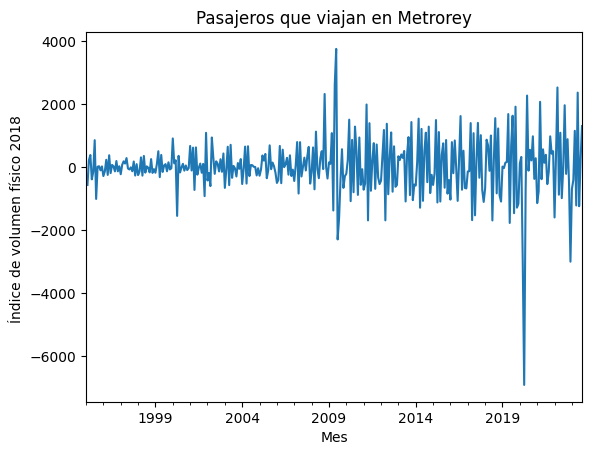

In [279]:
#Grafica primeras diferencias
pasajeros['miles de pasajeros diff'].plot()
plt.title('Pasajeros que viajan en Metrorey')
plt.xlabel('Mes')
plt.ylabel('Índice de volumen físico 2018 ')
plt.show();

In [280]:
#prueba adf segundas diferencias

prueba_adf_diff=adfuller(pasajeros['miles de pasajeros diff'].dropna())
pvalue_diff=prueba_adf_diff[1]
pvalue_diff.round(2)

0.0

H0:Serie no estacionaria

H1:Serie estacionaria

=> Rechazamos H0, entonces Las primeras diferencias miles de pasajeros es estacionario

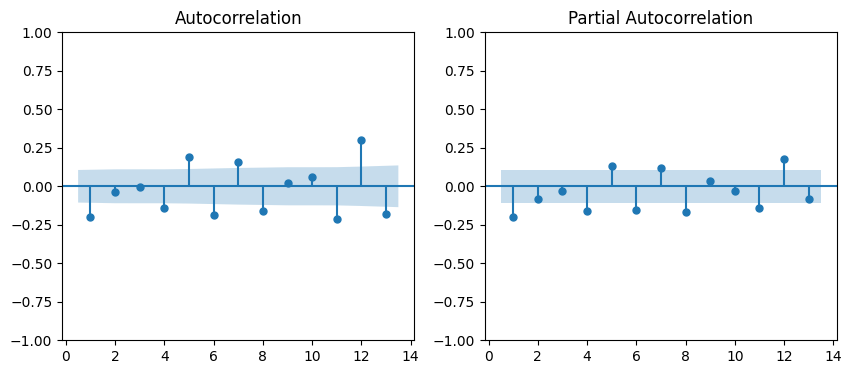

In [281]:
#graficas de correlacion

ig,ax=plt.subplots(1,2,figsize=(10,4))

#1
plot_acf(pasajeros['miles de pasajeros diff'].dropna(),zero=False,lags=13,ax=ax[0])

#2
plot_pacf(pasajeros['miles de pasajeros diff'].dropna(),zero=False,lags=13,ax=ax[1])

plt.show();

Tiene componente estacional

In [282]:
#determinar orden del proceso

arimaorder_aic=pm.auto_arima(pasajeros['miles de pasajeros'],
                             start_p=0,start_q=0,
                             max_p=7,max_q=7,
                             information_criterion='aic')
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)>

In [283]:
#hacemos if
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = sm.tsa.arima.ARIMA(pasajeros['miles de pasajeros'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

AR: 4, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 5, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [284]:
#revisamos que tipo de arima sugiere el AIC
ic.sort_values('AIC').head(4)

AIC          BIC
AR MA                          
2  4   5563.771592  5590.635705
3  4   5564.648866  5595.350710
   5   5566.524337  5601.063911
6  4   5567.115323  5609.330358

El AIC sugiere un ARIMA (2,1,4)

In [294]:
#estimamos modelo
model=ARIMA(pasajeros['miles de pasajeros'],order=(2,1,4))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     miles de pasajeros   No. Observations:                  344
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2774.886
Date:                Sat, 04 Nov 2023   AIC                           5563.772
Time:                        20:15:52   BIC                           5590.636
Sample:                    01-01-1995   HQIC                          5574.472
                         - 08-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7269      0.006   -303.810      0.000      -1.738      -1.716
ar.L2         -0.9969      0.006   -159.883      0.000      -1.009      -0.985
ma.L1          1.7298      0.037     46.914      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [295]:
#hacemos estimaciones escritas con el intervalo de confianza
forecast=results.get_forecast(steps=4)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [296]:
#vamos hasta que semana llega
pasajeros.tail(1)

,miles de pasajeros,ingresos (miles de pesos),miles de pasajeros diff
mes,,,
2023-08-01,12201.982,57821.901,1307.485


In [297]:
#establecemos cuantas semanas puede predecir
st='2021-01-01'
ed='2024-01-01'

In [298]:
pronostico_valor=forecast_mean[st:ed]
pronostico_intervalos=forecast_ci[st:ed]

In [299]:
df_forecast=pd.DataFrame({'pronostico':pronostico_valor,
                         'limite inferior':pronostico_intervalos['lower miles de pasajeros'],
                         'limite superior':pronostico_intervalos['upper miles de pasajeros']
                         })

In [300]:
df_forecast

,pronostico,limite inferior,limite superior
2023-09-01,11243.349266,9561.504248,12925.194284
2023-10-01,11992.305158,9610.383203,14374.227114
2023-11-01,11213.168220,8496.248334,13930.088107
2023-12-01,11659.554785,8670.399511,14648.710059


In [301]:
print(f'Pronosticamos que para el 01 de septiembre de 2023 habra {df_forecast.iloc[0,0].round(2)} pasajeros pero puede estar entre {df_forecast.iloc[0,1].round(2)} y {df_forecast.iloc[0,2].round(2)}\n')

print(f'Pronosticamos que para el 01 de octubre de 2023 habra {df_forecast.iloc[1,0].round(2)} pasajeros puede estar entre {df_forecast.iloc[1,1].round(2)} y {df_forecast.iloc[1,2].round(2)}\n')

print(f'Pronosticamos que para el 01 de noviembre de 2023 habra {df_forecast.iloc[2,0].round(2)} pasajeros puede estar entre {df_forecast.iloc[2,1].round(2)} y {df_forecast.iloc[2,2].round(2)}\n')

print(f'Pronosticamos que para el 01 de diciembre de 2023 habra {df_forecast.iloc[3,0].round(2)} pasajeros puede estar entre {df_forecast.iloc[3,1].round(2)} y {df_forecast.iloc[3,2].round(2)}')

Pronosticamos que para el 01 de septiembre de 2023 habra 11243.35 pasajeros pero puede estar entre 9561.5 y 12925.19

Pronosticamos que para el 01 de octubre de 2023 habra 11992.31 pasajeros puede estar entre 9610.38 y 14374.23

Pronosticamos que para el 01 de noviembre de 2023 habra 11213.17 pasajeros puede estar entre 8496.25 y 13930.09

Pronosticamos que para el 01 de diciembre de 2023 habra 11659.55 pasajeros puede estar entre 8670.4 y 14648.71


In [310]:
print(f'Pronosticamos que para el 01 de septiembre de 2023 habra ingresos de {(df_forecast.iloc[0,0]*7.1).round(2)} pero puede estar entre {(df_forecast.iloc[0,1]*7.1).round(2)} y {(df_forecast.iloc[0,2]*7.1).round(2)}\n')

print(f'Pronosticamos que para el 01 de octubre de 2023 habra ingresos de {(df_forecast.iloc[1,0]*7.1).round(2)} puede estar entre {(df_forecast.iloc[1,1]*7.1).round(2)} y {(df_forecast.iloc[1,2]*7.1).round(2)}\n')

print(f'Pronosticamos que para el 01 de noviembre de 2023 habra ingresos de {(df_forecast.iloc[2,0]*7.1).round(2)} puede estar entre {(df_forecast.iloc[2,1]*7.1).round(2)} y {(df_forecast.iloc[2,2]*7.1).round(2)}\n')

print(f'Pronosticamos que para el 01 de diciembre de 2023 habra ingresos de {(df_forecast.iloc[3,0]*7.1).round(2)} puede estar entre {(df_forecast.iloc[3,1]*7.1).round(2)} y {(df_forecast.iloc[3,2]*7.1).round(2)}')

Pronosticamos que para el 01 de septiembre de 2023 habra ingresos de 79827.78 pero puede estar entre 67886.68 y 91768.88

Pronosticamos que para el 01 de octubre de 2023 habra ingresos de 85145.37 puede estar entre 68233.72 y 102057.01

Pronosticamos que para el 01 de noviembre de 2023 habra ingresos de 79613.49 puede estar entre 60323.36 y 98903.63

Pronosticamos que para el 01 de diciembre de 2023 habra ingresos de 82782.84 puede estar entre 61559.84 y 104005.84
